NAME: JAI BAHUGUNA


---


PRN: 1032211530

---

Batch: A4

---

**Task A** - CHAIN CODE

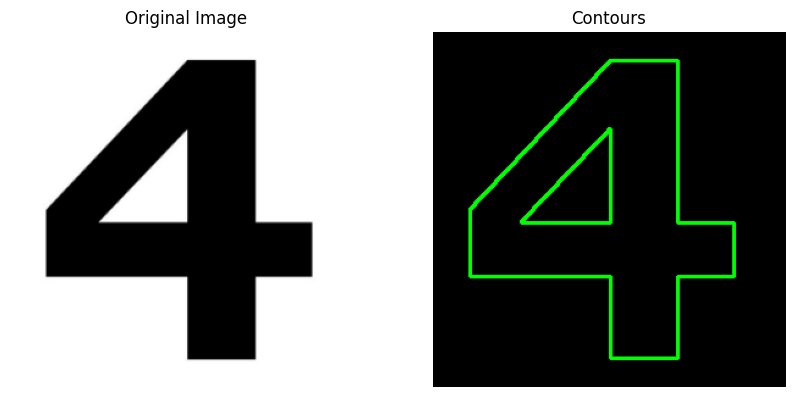

Chain Code for Contour 
 1 : [3, 3, 3, 3, 2, 0, 0, 0, 0, 2, 2, 0, 0, 6, 6, 7, 0, 6, 4, 4, 6, 6, 6, 6, 4, 4]
Chain Code for Contour 
 2 : [2, 2, 4, 4, 5, 7, 7]


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/number4.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to get a binary image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)
# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Display the original image and contour image using pyplot
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Contour image
contour_image = np.zeros_like(image)
for contour in contours:
    cv2.drawContours(contour_image, [contour], -1, (0, 255, 0), 2)

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Contours')
plt.axis('off')

plt.show()

# Generate chain code for each contour
for i, contour in enumerate(contours):
    chain_code = []
    for j in range(1, len(contour)):
      if j%30==0:
        # Calculate the direction from the previous point to the current one
        dx = contour[j][0][0] - contour[j-1][0][0]
        dy = contour[j][0][1] - contour[j-1][0][1]

        # Encode the direction into a chain code
        if dx == 1 and dy == 0:
            chain_code.append(0)
        elif dx == 1 and dy == 1:
            chain_code.append(1)
        elif dx == 0 and dy == 1:
            chain_code.append(2)
        elif dx == -1 and dy == 1:
            chain_code.append(3)
        elif dx == -1 and dy == 0:
            chain_code.append(4)
        elif dx == -1 and dy == -1:
            chain_code.append(5)
        elif dx == 0 and dy == -1:
            chain_code.append(6)
        elif dx == 1 and dy == -1:
            chain_code.append(7)

    # Print the chain code for each contour
    print("Chain Code for Contour \n", i+1, ":", chain_code)

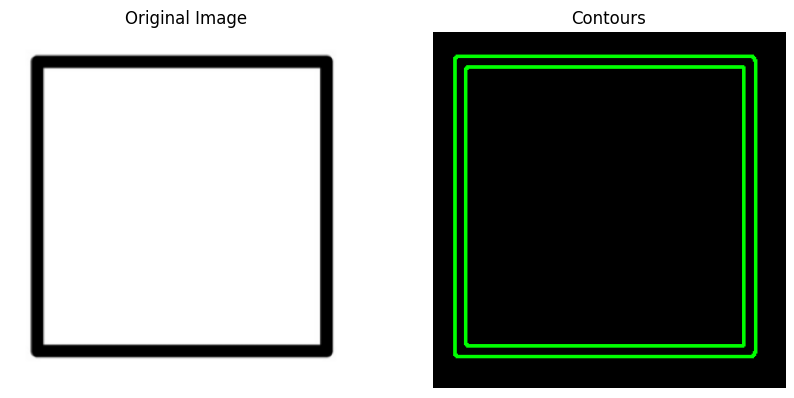

Chain Code for Contour 
 1 : [2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4]
Chain Code for Contour 
 2 : [0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6]


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/square.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to get a binary image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)
# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Display the original image and contour image using pyplot
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB),cmap='viridis')
plt.title('Original Image')
plt.axis('off')

# Contour image
contour_image = np.zeros_like(image)
for contour in contours:
    cv2.drawContours(contour_image, [contour], -1, (0, 255, 0), 2)

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Contours')
plt.axis('off')

plt.show()

# Generate chain code for each contour
for i, contour in enumerate(contours):
    chain_code = []
    for j in range(1, len(contour)):
      if j%30==0:
        # Calculate the direction from the previous point to the current one
        dx = contour[j][0][0] - contour[j-1][0][0]
        dy = contour[j][0][1] - contour[j-1][0][1]

        # Encode the direction into a chain code
        if dx == 1 and dy == 0:
            chain_code.append(0)
        elif dx == 1 and dy == 1:
            chain_code.append(1)
        elif dx == 0 and dy == 1:
            chain_code.append(2)
        elif dx == -1 and dy == 1:
            chain_code.append(3)
        elif dx == -1 and dy == 0:
            chain_code.append(4)
        elif dx == -1 and dy == -1:
            chain_code.append(5)
        elif dx == 0 and dy == -1:
            chain_code.append(6)
        elif dx == 1 and dy == -1:
            chain_code.append(7)

    # Print the chain code for each contour
    print("Chain Code for Contour \n", i+1, ":", chain_code)

PART 2- COMPARISON OF THE TWO CONTOURS

In [ ]:
import cv2

def generate_chain_code(image_path, sampling_step=10):

  # Load the image as a grayscale image
  image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

  # Threshold the image to obtain a binary image
  _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

  # Find the contours of the digit
  contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Check for empty contours and raise an error if none are found
  if not contours:
      raise ValueError("No contours found in the image")

  # Choose the contour with the largest area
  contour = max(contours, key=cv2.contourArea)

  # Sample points along the contour
  sampled_points = contour[::sampling_step]

  # Initialize the chain code
  chain_code = []

  # Start from the top-left pixel of the digit
  x, y = sampled_points[0][0]

  # Define a function that returns the chain code label for the next pixel in the boundary
  def next_pixel(pixel, width, height):
    x, y = pixel
    labels = [
      (0, -1), (1, -1), (1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0), (-1, -1)
    ]
    for label, (dx, dy) in enumerate(labels):
      nx, ny = x + dx, y + dy
      if 0 <= nx < width and 0 <= ny < height and binary_image[ny, nx] == 0:
        return label
    return -1

  # Iterate over the sampled points
  for i in range(1, len(sampled_points)):
    label = next_pixel((x, y), image.shape[1], image.shape[0])
    if label != -1:
      chain_code.append(label)
    x, y = sampled_points[i][0]

  return chain_code

# Process two images and generate chain codes
chain_code_1 = generate_chain_code('/content/number4.png')
print("Chain Code - Image 1:", chain_code_1)

chain_code_2 = generate_chain_code('/content/square.png')
print("\nChain Code - Image 2:", chain_code_2)

# Compare chain codes (modify this part for your specific similarity check)
if chain_code_1 == chain_code_2:
  print("Shapes are similar.")
else:
  print("Shapes are different.")

difference_code = [abs(a - b) for a, b in zip(chain_code_1, chain_code_2)]
print("\nDifference:", difference_code)


Chain Code - Image 1: [0, 6, 3]

Chain Code - Image 2: [0]
Shapes are different.

Difference: [0]
